<a href="https://colab.research.google.com/github/sevinpr/fyp_poc/blob/main/poc_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Loading
Load and preprocess real and GAN-generated images, split into training and testing sets, and create data generators.

In [ ]:
!pip install zipfile36

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')





# Define paths to real and GAN-generated images
# zip_file_path = '/content/drive/MyDrive/imagenet_ai_0419_biggan.zip'
real_images_path = "/content/rvf10k/train/real"
gan_images_path = "/content/rvf10k/train/fake"

!unzip /content/stylegan.zip

# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), target_size=(128, 128))
        if img is not None:
            images.append(tf.keras.preprocessing.image.img_to_array(img))
            labels.append(label)
    return images, labels

real_images, real_labels = load_images_from_folder(real_images_path, 0)
gan_images, gan_labels = load_images_from_folder(gan_images_path, 1)

# Combine and split the data
images = np.array(real_images + gan_images)
labels = np.array(real_labels + gan_labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

Streaming output truncated to the last 5000 lines.
  inflating: rvf10k/train/real/28056.jpg  
  inflating: rvf10k/train/real/28081.jpg  
  inflating: rvf10k/train/real/28160.jpg  
  inflating: rvf10k/train/real/28181.jpg  
  inflating: rvf10k/train/real/28190.jpg  
  inflating: rvf10k/train/real/28192.jpg  
  inflating: rvf10k/train/real/28194.jpg  
  inflating: rvf10k/train/real/28197.jpg  
  inflating: rvf10k/train/real/28199.jpg  
  inflating: rvf10k/train/real/28247.jpg  
  inflating: rvf10k/train/real/28281.jpg  
  inflating: rvf10k/train/real/28308.jpg  
  inflating: rvf10k/train/real/28316.jpg  
  inflating: rvf10k/train/real/28332.jpg  
  inflating: rvf10k/train/real/28342.jpg  
  inflating: rvf10k/train/real/28345.jpg  
  inflating: rvf10k/train/real/28347.jpg  
  inflating: rvf10k/train/real/28392.jpg  
  inflating: rvf10k/train/real/28395.jpg  
  inflating: rvf10k/train/real/28401.jpg  
  inflating: rvf10k/train/real/28412.jpg  
  inflating: rvf10k/train/real/28461.jpg  
  i

# Build CNN Model Architecture
Create a CNN model using deep learning framework with convolutional layers, pooling layers, and dense layers for binary classification.

In [4]:
# Build CNN Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training
Train the model using the prepared dataset, implement callbacks for model checkpointing and early stopping.

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
class_weights = {0: 1.0, 1: 2.0}

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping],
    class_weight=class_weights
)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.5526 - loss: 0.9297 - val_accuracy: 0.5200 - val_loss: 0.7297
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.5338 - loss: 0.9217 - val_accuracy: 0.5250 - val_loss: 0.7487
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.5471 - loss: 0.9088 - val_accuracy: 0.5557 - val_loss: 0.6886
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.5584 - loss: 0.8968 - val_accuracy: 0.5943 - val_loss: 0.6714
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.5601 - loss: 0.8994 - val_accuracy: 0.5464 - val_loss: 0.6848
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.5712 - loss: 0.8851 - val_accuracy: 0.5593 - val_loss: 0.7042
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.5617 - loss: 0.8817 - val_accuracy: 0.5664 - val_loss: 0.6974
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.5651 - loss: 0.8921 - val_accu

# Model Evaluation
Evaluate model performance using accuracy, precision, recall, F1-score, and confusion matrix on test set.

44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step
Accuracy: 0.4943
Precision: 0.4913
Recall: 0.7750
F1 Score: 0.6014


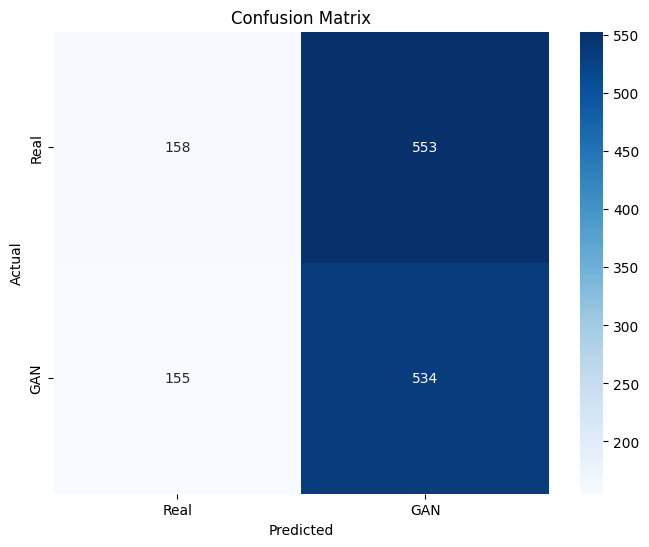

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
model.load_weights('best_model.keras')

# Predict on the test set
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'GAN'], yticklabels=['Real', 'GAN'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Test with Sample Images
Load and test the model with new sample images to demonstrate practical usage.

47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step


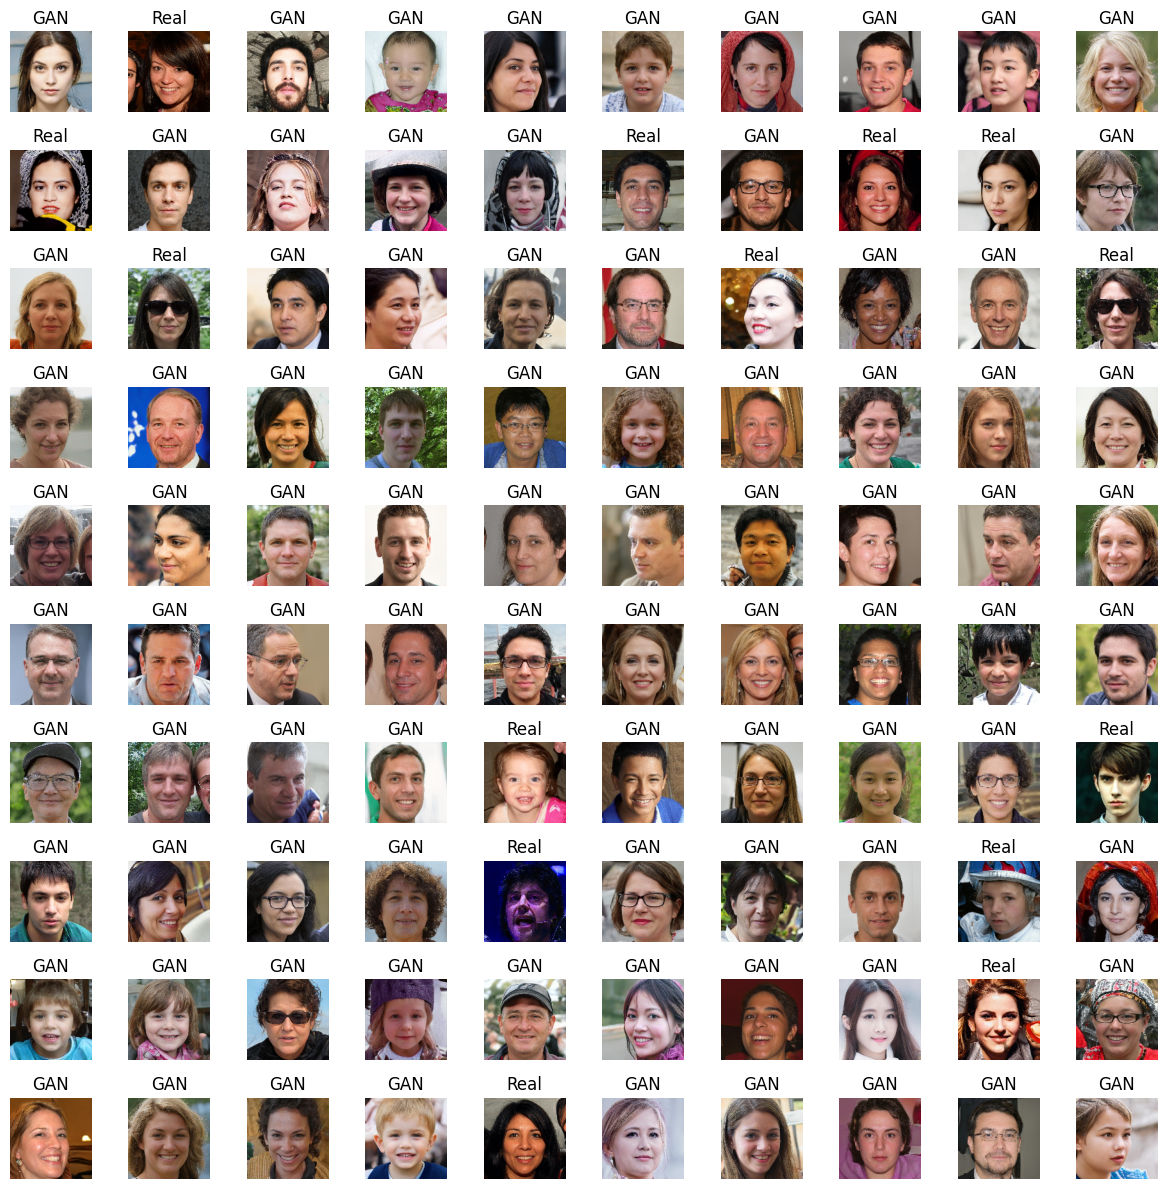

In [17]:
# Load and test the model with new sample images to demonstrate practical usage

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load sample images
sample_images_path = "/content/rvf10k/valid/fake"
sample_images, _ = load_images_from_folder(sample_images_path, None)
sample_images = np.array(sample_images) / 255.0  # Normalize the images

# Predict on sample images
sample_predictions = model.predict(sample_images)
sample_predictions = (sample_predictions > 0.5).astype("int32")

# Plot sample images with predictions
# Adjust the number of rows and columns to accommodate the number of sample images
num_rows = 10  # Increased number of rows
num_cols = 10  # Increased number of columns
num_images_to_display = num_rows * num_cols  # Total number of images to display


# Plot sample images with predictions
plt.figure(figsize=(12, 12))
for i in range(min(num_images_to_display, len(sample_images))):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i])
    plt.title('GAN' if sample_predictions[i] == 1 else 'Real')
    plt.axis('off')
plt.tight_layout()
plt.show()